# WeatherPy
----

### Background
Here I visualize the weather of 500+ cities across the world of varying distance from the equator. I accomplish this by utilizing the [CityPy Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities to answer the fundamental question: "What's the weather like as we approach the equator?".

### Observations

1. The further north or south from the equator you travel the location's temperature gets cooler. This means that the location's temperature has definite inverse correlation with it's latitude. As expected, the closer you are to the equator the warmer the weather is for those locations closer to 0 degrees latitude.

2. It seems that the northern hemisphere is warmer during this time of year than the southern hemisphere.

3. There doesn't seem to be any signification coorelation between cloudiness and latitude, but there is definitely a positive correlation between wind speeds and latitude.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [11]:
lng_range[1]

180

## Generate Cities List

In [58]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [59]:
api = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q='

In [60]:
# loop through each city and query the api for city information
# store each city in a temporary dictionary for processing later
temp = {}
counter = 0
for city in cities:
    counter += 1
    # print each city as it's being processed
    print(f'{counter}) - {city}')
    response = requests.get(api + city).json()
    temp[city] = response
    # for every 60 api calls wait 60 seconds to not get blocked by api service
    if ( (counter >= 60) & (counter % 60 == 0) ):
        time.sleep(60)

1) - kavieng
2) - clyde river
3) - georgetown
4) - hasaki
5) - luancheng
6) - puerto ayora
7) - sarab
8) - bredasdorp
9) - tuktoyaktuk
10) - gidole
11) - airai
12) - cape town
13) - provideniya
14) - port elizabeth
15) - xocali
16) - mataura
17) - lavrentiya
18) - ushuaia
19) - bambous virieux
20) - castro
21) - arraial do cabo
22) - pisco
23) - ilulissat
24) - busselton
25) - belushya guba
26) - ancud
27) - karmala
28) - east london
29) - nizhneyansk
30) - padang
31) - waingapu
32) - tokur
33) - atuona
34) - salta
35) - jizan
36) - portland
37) - arinos
38) - souillac
39) - rikitea
40) - komsomolsk
41) - bethel
42) - erdaojiang
43) - thompson
44) - treinta y tres
45) - punta arenas
46) - norman wells
47) - avarua
48) - zeya
49) - isangel
50) - sao joao da barra
51) - kapaa
52) - yellowknife
53) - bengkulu
54) - barrow
55) - birao
56) - dzheguta
57) - kodiak
58) - lebu
59) - champerico
60) - albany
61) - natitingou
62) - okhotsk
63) - innisfail
64) - chokurdakh
65) - luderitz
66) - tsy

505) - comodoro rivadavia
506) - seymchan
507) - nohar
508) - carlagan
509) - flin flon
510) - lang son
511) - maceio
512) - yertsevo
513) - sibu
514) - pelym
515) - tumannyy
516) - yatou
517) - dalvik
518) - kikwit
519) - bourail
520) - kiruna
521) - nanortalik
522) - kadykchan
523) - santa cruz de la palma
524) - hudson bay
525) - marcona
526) - iqaluit
527) - port-cartier
528) - berbera
529) - paradwip
530) - saint-augustin
531) - manavalakurichi
532) - drochia
533) - manokwari
534) - soest
535) - solnechnyy
536) - namatanai
537) - puksoozero
538) - huarmey
539) - dunedin
540) - sinegorye
541) - asnaes
542) - leesburg
543) - sal rei
544) - esso
545) - awjilah
546) - bundaberg
547) - kailua
548) - sangar
549) - camacupa
550) - sambava
551) - soe
552) - sept-iles
553) - vagur
554) - saint-leu
555) - ferkessedougou
556) - mahur
557) - macapa
558) - dingle
559) - paita
560) - mahebourg
561) - muros
562) - esperance
563) - hofn
564) - rio gallegos
565) - burnie
566) - at-bashi
567) - tyr

In [61]:
# clean up list of cities and remove all not found results
cuidades = {}

for (city, data) in temp.items():
    if data['cod'] == 200:
        cuidades[city] = {
            'id'            : data['id'],
            'name'          : data['name'],
            'feels_like'    : data['main']['feels_like'],
            'humidity'      : data['main']['humidity'],
            'pressure'      : data['main']['pressure'],
            'temperature'   : data['main']['temp'],
            'temp_max'      : data['main']['temp_max'],
            'temp_min'      : data['main']['temp_min'],
            'weather'       : data['weather'][0]['description'],
            'wind_speed'    : data['wind']['speed'],
            'datetime'      : data['dt'],
            'timezone'      : data['timezone'],
            'country'       : data['sys']['country'],
            'sunrise'       : data['sys']['sunrise'],
            'sunset'        : data['sys']['sunset'],
            'latitude'      : data['coord']['lat'],
            'longitude'      : data['coord']['lon'],
            'clouds'        : data['clouds']['all']
        }


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [62]:
# create dataframe from values
cities_df = pd.DataFrame(cuidades.values())

# check and display dataframe
print(cities_df.shape)
cities_df.head(5)

(588, 18)


,id,name,feels_like,humidity,pressure,temperature,temp_max,temp_min,weather,wind_speed,datetime,timezone,country,sunrise,sunset,latitude,longitude,clouds
0,2094342,Kavieng,305.02,74,1007,301.45,301.45,301.45,light rain,2.56,1586059827,36000,PG,1586030224,1586073694,-2.57,150.80,5
1,5924351,Clyde River,246.37,77,1036,258.15,258.15,258.15,clear sky,11.80,1586059827,-14400,CA,1586077998,1586131205,70.47,-68.59,1
2,1735106,George Town,310.77,70,1011,304.98,305.15,304.82,few clouds,1.50,1586059630,28800,MY,1586042125,1586086008,5.41,100.34,20
3,2112802,Hasaki,276.90,66,1011,283.55,285.37,282.04,light intensity shower rain,7.70,1586059827,32400,JP,1586031445,1586077257,35.73,140.83,75
4,1802204,Luancheng,284.03,30,1026,287.15,287.15,287.15,overcast clouds,1.00,1586059827,28800,CN,1586037628,1586083638,37.88,114.65,100


In [64]:
# export DataFrame to CSV file
cities_df.to_csv('data/cities.csv', index=False, header=True, encoding='utf-8')

# delete variable
del cities_df

### Load CSV to DataFrame

In [66]:
# read CSV file to DataFrame
cities_df = pd.read_csv('data/cities.csv', encoding='utf-8', low_memory=False)

# check dataframe
print(cities_df.shape)
cities_df.head(2)

(588, 18)


,id,name,feels_like,humidity,pressure,temperature,temp_max,temp_min,weather,wind_speed,datetime,timezone,country,sunrise,sunset,latitude,longitude,clouds
0,2094342,Kavieng,305.02,74,1007,301.45,301.45,301.45,light rain,2.56,1586059827,36000,PG,1586030224,1586073694,-2.57,150.80,5
1,5924351,Clyde River,246.37,77,1036,258.15,258.15,258.15,clear sky,11.80,1586059827,-14400,CA,1586077998,1586131205,70.47,-68.59,1


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [67]:
# get bounding box boundaries
BBox = ((cities_df.longitude.min(),   cities_df.longitude.max(),      
         cities_df.latitude.min(), cities_df.latitude.max()))
BBox

(-175.2, 179.32, -54.8, 78.22)

#### Latitude vs. Temperature Plot

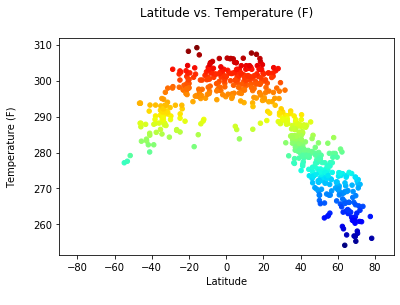

In [68]:
fig = cities_df.plot(kind='scatter', 
                     x='latitude', 
                     y='temperature',
                     xlim=lat_range,
                     title='Latitude vs. Temperature (F)\n', 
                     c='temperature',
                     colorbar=False,
                     cmap='jet').get_figure()

plt.ylabel('Temperature (F)\n')
plt.xlabel('Latitude\n')

# save chart to file
fig.savefig('images/1_lat_temp.png', bbox_inches='tight')

# display chart
plt.show()

#### Latitude vs. Humidity Plot

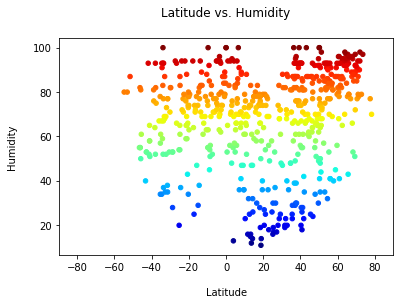

In [69]:
fig = cities_df.plot(kind='scatter', 
                     x='latitude', 
                     y='humidity', 
                     xlim=lat_range,
                     title='Latitude vs. Humidity\n', 
                     c='humidity', 
                     colorbar=False,
                     cmap='jet').get_figure()

plt.ylabel('Humidity\n')
plt.xlabel('\nLatitude')

# save chart to file
fig.savefig('images/2_lat_humidity.png', bbox_inches='tight')

# display chart
plt.show()

#### Latitude vs. Cloudiness Plot

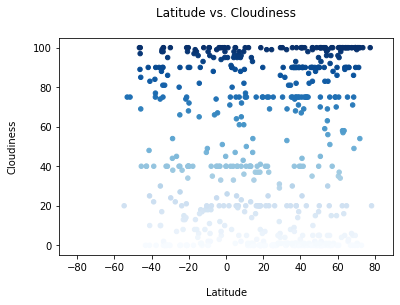

In [70]:
fig = cities_df.plot(kind='scatter', 
                     x='latitude', 
                     y='clouds',
                     xlim=lat_range,
                     title='Latitude vs. Cloudiness\n', 
                     c='clouds',
                     colorbar=False,
                     cmap='Blues').get_figure()

plt.ylabel('Cloudiness\n')
plt.xlabel('\nLatitude')

# save chart to file
fig.savefig('images/3_lat_cloudiness.png', bbox_inches='tight')

# display chart
plt.show()

#### Latitude vs. Wind Speed Plot

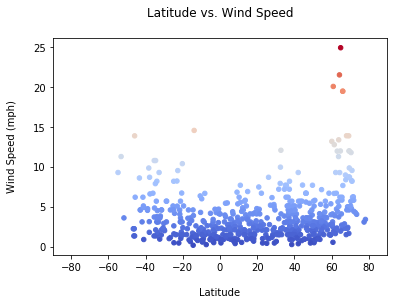

In [71]:
fig = cities_df.plot(kind='scatter', 
                     x='latitude', 
                     y='wind_speed', 
                     xlim=lat_range,
                     title='Latitude vs. Wind Speed\n', 
                     c='wind_speed',
                     colorbar=False,
                     cmap='coolwarm').get_figure()

plt.ylabel('Wind Speed (mph)\n')
plt.xlabel('\nLatitude')

# save chart to file
fig.savefig('images/4_lat_wind_speed.png', bbox_inches='tight')

# display chart
plt.show()

## Linear Regression

In [72]:
# function to create Linear Regression plots
def plot_regression_line(x, 
                         y, 
                         title='', 
                         ylabel='',
                         xlabel='',
                         xaxis_top = False,
                         cmap='coolwarm', 
                         line='red',
                         output=''
                        ):
    
    # prepare plot figure
    fig = plt.figure()
    
    # calculating linear regression
    slope, intercept, r_value, p_value, stderr  = linregress(x, y)
    rsq_value   = round(r_value**2,2)
    
    # predicted response vector
    y_pred = intercept + slope*x
    
    # plotting the points as per dataset on a graph
    plt.scatter(x, y, c=x, cmap=cmap)
    
    # set title
    plt.title(title + '\n')
    
    # plotting the regression line
    plt.plot(x, y_pred, color=line)
    line_eq     = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #plt.annotate(line_eq, (0,10), fontsize = 15, color='r')
    
    # putting labels for x and y axis
    if(xaxis_top == True):
        plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = True, labeltop=True)

    if(xlabel != ''):
        plt.xlabel(f'\n{xlabel}')
    #else:plt.xlabel(f'\nThe r-squared value is: {rsq_value}')
        
        
    plt.ylabel(ylabel + '\n')
    
    # if output defined, save chart to file
    if (output != ''):
        fig.savefig('images/' + output, bbox_inches='tight')
    
    # function to show plotted group
    plt.show()

In [73]:
# Create Northern and Southern Hemisphere DataFrames
cond1 = (cities_df['latitude'] >= 0)
north = cities_df[cond1]

cond2 = (cities_df['latitude'] < 0)
south = cities_df[cond2]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

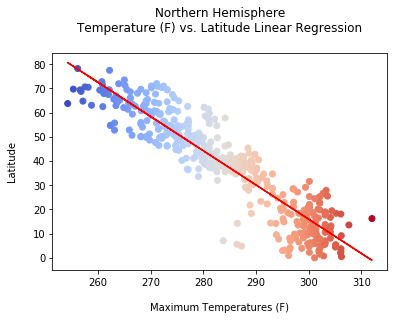

In [74]:
# generate regression line plot
plot_regression_line(north['temp_max'], 
                     north['latitude'],
                     xlabel='Maximum Temperatures (F)',
                     ylabel='Latitude',
                     title='Northern Hemisphere\nTemperature (F) vs. Latitude Linear Regression',
                     cmap='coolwarm',
                     output='north_max_temp_lat.png'
                    )

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

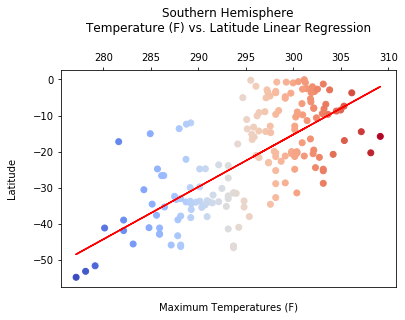

In [75]:
# generate regression line plot
plot_regression_line(south['temp_max'], 
                     south['latitude'],
                     xlabel='Maximum Temperatures (F)',
                     ylabel='Latitude',
                     title='Southern Hemisphere\nTemperature (F) vs. Latitude Linear Regression',
                     xaxis_top = True,
                     cmap='coolwarm',
                     output='south_max_temp_lat.png'
                    )

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

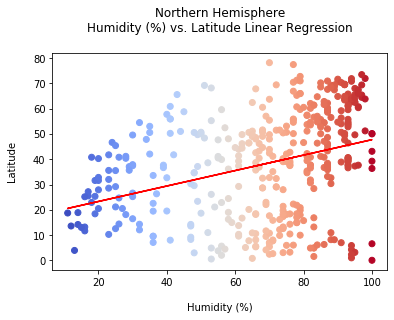

In [82]:
# generate regression line plot
plot_regression_line(north['humidity'], 
                     north['latitude'], 
                     xlabel='Humidity (%)',
                     ylabel='Latitude', 
                     title='Northern Hemisphere\nHumidity (%) vs. Latitude Linear Regression',
                     cmap='coolwarm',
                     output='north_humidity_lat.png'
                    )

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

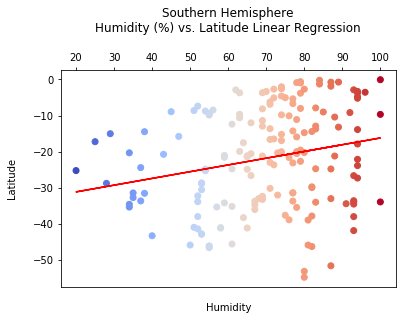

In [77]:
# generate regression line plot
plot_regression_line(south['humidity'], 
                     south['latitude'],
                     xlabel='Humidity',
                     ylabel='Latitude',
                     title='Southern Hemisphere\nHumidity (%) vs. Latitude Linear Regression',
                     xaxis_top = True,
                     cmap='coolwarm',
                     output='south_humidity_lat.png'
                    )

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

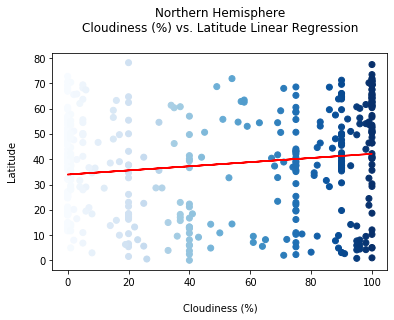

In [78]:
# generate regression line plot
plot_regression_line(north['clouds'], 
                     north['latitude'],
                     xlabel='Cloudiness (%)',
                     ylabel='Latitude', 
                     title='Northern Hemisphere\nCloudiness (%) vs. Latitude Linear Regression',
                     cmap='Blues',
                     output='north_cloudiness_lat.png'
                    )

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

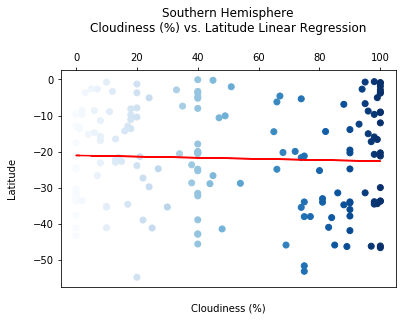

In [79]:
# generate regression line plot
plot_regression_line(south['clouds'], 
                     south['latitude'], 
                     xlabel='Cloudiness (%)',
                     ylabel='Latitude', 
                     title='Southern Hemisphere\nCloudiness (%) vs. Latitude Linear Regression',
                     xaxis_top = True,
                     cmap='Blues',
                     output='south_cloudiness_lat.png'
                    )

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

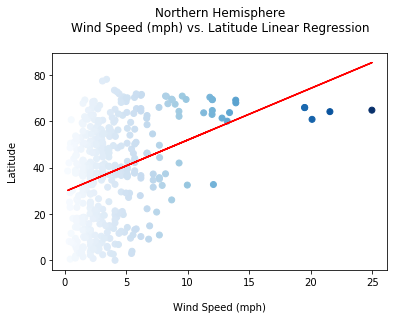

In [80]:
# generate regression line plot
plot_regression_line(north['wind_speed'], 
                     north['latitude'],
                     xlabel='Wind Speed (mph)',
                     ylabel='Latitude', 
                     title='Northern Hemisphere\nWind Speed (mph) vs. Latitude Linear Regression',
                     cmap='Blues',
                     output='north_wind_speed_lat.png'
                    )

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

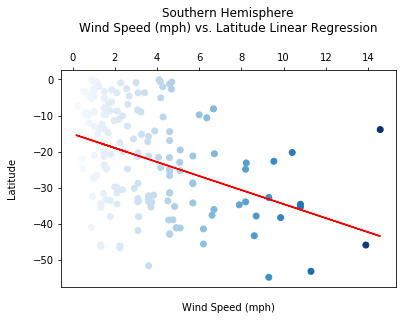

In [81]:
# generate regression line plot
plot_regression_line(south['wind_speed'], 
                     south['latitude'],
                     xlabel='Wind Speed (mph)',
                     ylabel='Latitude', 
                     title='Southern Hemisphere\nWind Speed (mph) vs. Latitude Linear Regression',
                     xaxis_top = True,
                     cmap='Blues',
                     output='south_wind_speed_lat.png'
                    )